In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

# 1 - Read answers from a csv file and change the values for numbers. Also drop all the rows with no answer at all.

In [2]:
df = pd.read_csv('answers.csv', index_col=0)
df.replace('Totally agree',5, inplace=True)
df.replace('Agree',4, inplace=True)
df.replace('Usually',4, inplace=True)
df.replace('Neither agree or disagree',3, inplace=True)
df.replace('Disagree',2, inplace=True)
df.replace('Strongly disagree',1, inplace=True)
df.dropna(how='all', inplace=True)

In [3]:
df

,Gender,Age,EI1,EI2,EI3,EI5,EI6,EI7,EI4,EI8,...,LP21,LP22,LP23,LP24,LP25,LP26,LP27,LP28,LP29,LP30
Part_ID,,,,,,,,,,,,,,,,,,,,,
P1,Female,40.0,4,2,4,2,1,4,2,4,...,4,4,3,3,4,4,4,5,4,4
P2,Male,50.0,5,2,4,3,1,2,2,4,...,4,4,4,4,4,4,4,4,4,4
P3,Male,50.0,4,3,3,2,2,4,3,5,...,4,3,4,4,4,3,4,4,4,3
P4,Female,40.0,4,2,4,2,3,2,1,4,...,4,4,2,3,4,4,4,4,4,2
P5,Male,30.0,4,2,3,4,2,4,2,3,...,5,4,3,5,4,3,4,3,4,3
P6,Male,50.0,4,1,2,1,1,4,1,5,...,4,5,4,4,4,3,3,4,4,4
P7,Female,30.0,4,2,4,3,4,4,2,4,...,4,4,4,5,5,3,4,4,4,4
P8,Male,40.0,4,2,3,2,2,3,1,5,...,4,4,4,5,4,4,5,4,5,4
P9,Female,40.0,4,1,3,2,1,3,1,4,...,3,4,3,4,4,3,4,5,4,4


# 2 - Separate the Emotional Intelligence (EI) questions from the ones of Leadership Practices (LP)

In [4]:
EI_df = df[['EI1','EI2','EI3','EI4','EI5','EI6','EI7','EI8','EI9','EI10','EI11','EI12','EI13','EI14','EI15',
            'EI16','EI17','EI18','EI19', 'EI20', 'EI21','EI22','EI23','EI24','EI25',
            'EI26','EI27','EI28','EI29', 'EI30', 'EI31']]

In [5]:
LP_df = df[['LP1','LP2','LP3','LP4','LP5','LP6','LP7','LP8','LP9','LP10','LP11','LP12','LP13','LP14','LP15',
            'LP16','LP17','LP18','LP19', 'LP20', 'LP21','LP22','LP23','LP24','LP25',
            'LP26','LP27','LP28','LP29', 'LP30']]

# 3 - Invert the questions that are reversed in the questionnaire

In [6]:
def invert_question(value):
    if value==1:
        return 5
    elif value==2:
        return 4
    elif value==3:
        return 3
    elif value==4:
        return 2
    elif value==5:
        return 1
    else:
        print('Wrong value!')
        return 100000

In [7]:
reversed_questions = ['EI2', 'EI4', 'EI5', 'EI29', 'EI11', 'EI22', 'EI6', 'EI13', 'EI27', 'EI31', 'EI10', 'EI23']

for question in reversed_questions:
    new_col = question+'_R'
    EI_df[new_col] = EI_df[question].apply(invert_question)

/Users/eric/Downloads/Data_All_180307/CSV/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# 4 - Separate the dimensions for EI

In [8]:
ESA_cols = ['EI2_R', 'EI4_R', 'EI24', 'EI28']
EE_cols = ['EI5_R', 'EI7', 'EI9', 'EI18', 'EI29_R']
EAO_cols = ['EI11_R', 'EI12', 'EI19', 'EI22_R']
ER_cols = ['EI1', 'EI8', 'EI15', 'EI16', 'EI17']
ESM_cols = ['EI3', 'EI6_R', 'EI13_R', 'EI20', 'EI21']
EMO_cols = ['EI14', 'EI25', 'EI27_R', 'EI31_R']
ESC_cols = ['EI10_R', 'EI23_R', 'EI26', 'EI30']

In [9]:
ESA_df = EI_df[ESA_cols].sum(axis=1)
EE_df = EI_df[EE_cols].sum(axis=1)
EAO_df = EI_df[EAO_cols].sum(axis=1)
ER_df = EI_df[ER_cols].sum(axis=1)
ESM_df = EI_df[ESM_cols].sum(axis=1)
EMO_df = EI_df[EMO_cols].sum(axis=1)
ESC_df = EI_df[ESC_cols].sum(axis=1)

In [10]:
EI_Cats_df = pd.DataFrame([ESA_df,EE_df, EAO_df, ER_df, ESM_df, EMO_df, ESC_df], 
                          index=['ESA', 'EE', 'EAO', 'ER', 'ESM', 'EMO', 'ESC']).T
EI_Cats_df['Total'] = EI_Cats_df.sum(axis=1)
EI_Cats_df

,ESA,EE,EAO,ER,ESM,EMO,ESC,Total
Part_ID,,,,,,,,
P1,16,21,15,20,18,18,15,123
P2,16,17,16,21,22,16,18,126
P3,14,18,13,20,16,14,15,110
P4,18,16,16,20,16,14,15,115
P5,14,18,16,19,17,16,12,112
P6,19,19,19,21,18,18,18,132
P7,18,20,18,20,14,19,16,125
P8,17,18,16,19,17,16,12,115
P9,17,16,17,21,18,15,15,119


# Distribution of the scores of EI

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d0365f8>,
      dtype=object)

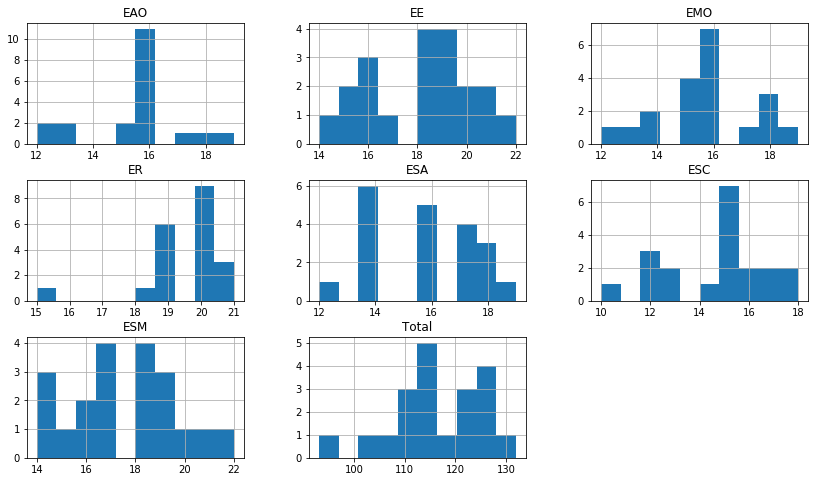

In [13]:
EI_Cats_df.hist(figsize=((14,8)))

In [20]:
avr_cats = EI_Cats_df.mean()
std_cats = EI_Cats_df.std()

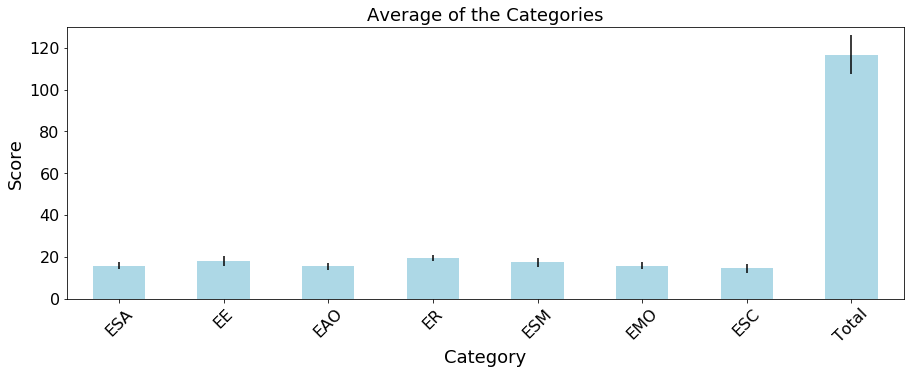

In [26]:
p = avr_cats.plot(figsize=((15,5)),legend=False,kind="bar",rot=45,color="lightblue",fontsize=16,yerr=std_cats)
p.set_title("Average of the Categories", fontsize=18);
p.set_xlabel("Category", fontsize=18);
p.set_ylabel("Score", fontsize=18);
p.set_ylim(0,130);

# Correlations between EI factors

In [27]:
EI_corr = EI_Cats_df.corr()
EI_corr

,ESA,EE,EAO,ER,ESM,EMO,ESC,Total
ESA,1.000000,0.363417,0.772910,0.617504,0.221617,0.626480,0.480969,0.812984
EE,0.363417,1.000000,0.232407,0.297922,0.154878,0.658562,0.182289,0.607476
EAO,0.772910,0.232407,1.000000,0.646362,0.098548,0.699209,0.268371,0.718663
ER,0.617504,0.297922,0.646362,1.000000,0.259038,0.515406,0.439721,0.729007
ESM,0.221617,0.154878,0.098548,0.259038,1.000000,0.124916,0.586303,0.542030
EMO,0.626480,0.658562,0.699209,0.515406,0.124916,1.000000,0.343006,0.795361
ESC,0.480969,0.182289,0.268371,0.439721,0.586303,0.343006,1.000000,0.696721
Total,0.812984,0.607476,0.718663,0.729007,0.542030,0.795361,0.696721,1.000000


In [28]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [29]:
EI_pvalues = calculate_pvalues(EI_Cats_df)
EI_pvalues = EI_pvalues.convert_objects(convert_numeric=True)

/Users/eric/Downloads/Data_All_180307/CSV/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [30]:
EI_pvalues.ESA 
EI_corr.ESA

ESA      1.000000
EE       0.363417
EAO      0.772910
ER       0.617504
ESM      0.221617
EMO      0.626480
ESC      0.480969
Total    0.812984
Name: ESA, dtype: float64

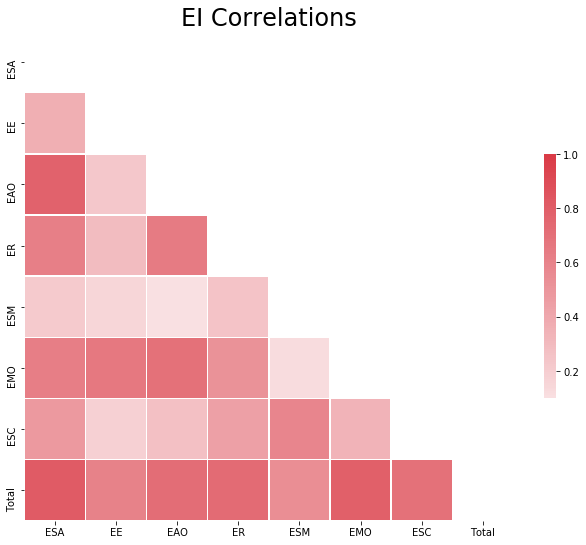

In [31]:
# Generate a mask for the upper triangle
mask = np.zeros_like(EI_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('EI Correlations', fontsize=24)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(EI_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

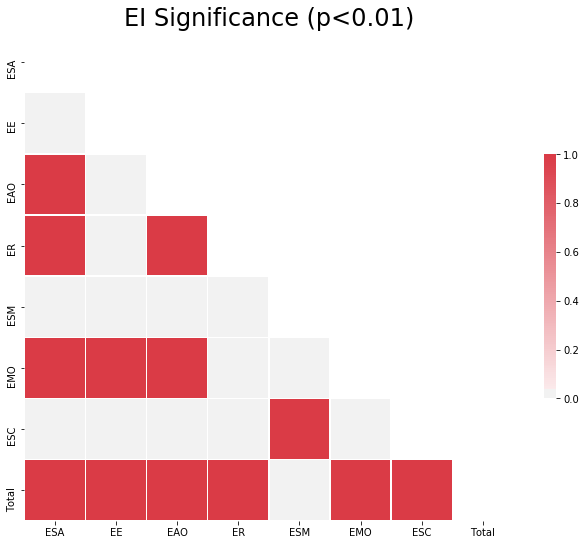

In [32]:
EI_pvalues_bin = EI_pvalues < 0.01

# Generate a mask for the upper triangle
mask = np.zeros_like(EI_pvalues_bin, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('EI Significance (p<0.01)', fontsize=24)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(EI_pvalues_bin, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

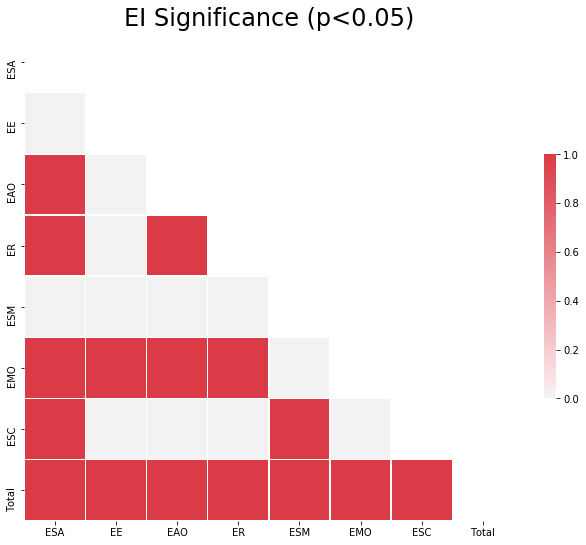

In [33]:
EI_pvalues_bin = EI_pvalues < 0.05

# Generate a mask for the upper triangle
mask = np.zeros_like(EI_pvalues_bin, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('EI Significance (p<0.05)', fontsize=24)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(EI_pvalues_bin, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# LP + EI

In [34]:
LP_total = LP_df.sum(axis=1)
LP_total.name = 'LP Total'

In [35]:
pd.DataFrame([LP_total, EI_Cats_df.EE]).T.corr()


,LP Total,EE
LP Total,1.000000,0.311052
EE,0.311052,1.000000


In [36]:
pearsonr(LP_total, EI_Cats_df.EE)

(0.3110524967050236, 0.1819093936623656)

In [37]:
for col in EI_Cats_df.columns:
    
    c, p = pearsonr(LP_total, EI_Cats_df[col])
    if p < 0.01:
        print('{}*: \nCorrelation = \t{}\np value=\t{}\n'.format(col, c, p))
    elif p < 0.05:
        print('{}**: \nCorrelation = \t{}\np value=\t{}\n'.format(col, c, p))
    else:
        print('{} (Not significant): \nCorrelation = \t{}\np value=\t{}\n'.format(col, c, p))
print('-----------------------------------')
print('* p < 0.01')
print('** p < 0.05')

ESA*: 
Correlation = 	0.5956150557547818
p value=	0.005588756989760461

EE (Not significant): 
Correlation = 	0.3110524967050236
p value=	0.1819093936623656

EAO*: 
Correlation = 	0.6607303971391223
p value=	0.0015172740346451003

ER*: 
Correlation = 	0.6024893282492599
p value=	0.004933330480409847

ESM (Not significant): 
Correlation = 	0.24522891707655559
p value=	0.2973643808176923

EMO*: 
Correlation = 	0.6858858647128364
p value=	0.0008420665838398137

ESC (Not significant): 
Correlation = 	0.2987343062698492
p value=	0.2007513970241164

Total*: 
Correlation = 	0.6697216675107961
p value=	0.0012369941048810896

-----------------------------------
* p < 0.01
** p < 0.05
